# Retail Analytics

### Context
<b>One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent</b>

### Data and Content
<b><br>1: Historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas.</b></br>
<b><br>2: File contains 3 files 1: Store Details, Sales Details and Features(data related more to stores and sales etc)</br></b>

### Task
<br><b>1: Combine each different of sales,stores and features into one whole data </b></br>
<br><b>2: Performed data cleaning by handling missing values, categorical features </b></br>
<br><b>3: Exploratory Data Analysis to understand data and each features by plotting visualizations like various plots </b></br>
<br><b>4: Decomposition of Time Series (Stationary and Non Stationary) using KPSS and ADF test </br></b>
<br><b>5: Performed baseline models like Moving Average, Weighted Moving AVerage, Exponential Moving Average and Exponential Smoothing and evaluated the results using metric</br></b>
<br><b>6: Performed ARIMA time series model to predict monthly sales for retail chain and evaluated its diagnostics </b></br>
<br><b>7: Performed LSTM Time series model to predict weekly sales for retail chain and evaluated the model </b></br>
    

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [71]:
# loading the datasets
# Data related to store, departments etc
feature=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/Retail Analytics/Features data set.csv")
sales=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/Retail Analytics/sales data-set.csv")
stores=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/Retail Analytics/stores data-set.csv")

In [72]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [73]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [74]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [75]:
# Merging all three dataframes
df_features = feature.merge(stores, on = 'Store')
df = df_features.merge(sales, on = ['Store','Date','IsHoliday'])

In [76]:
df.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [77]:
# checking null values
df.isna().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
Dept                 0
Weekly_Sales         0
dtype: int64

In [78]:
df=df.fillna(0)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [80]:
# convert column to datetime pandas
df['Date'] = pd.to_datetime(df['Date'])

In [81]:
df = df.sort_values(by = ['Date'])
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
120124,13,2010-01-10,68.74,2.853,0.0,0.0,0.0,0.0,0.0,126.234600,7.795,False,A,219622,14,20922.18
373364,40,2010-01-10,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,5.287,False,A,155083,74,9872.41
373365,40,2010-01-10,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,5.287,False,A,155083,79,10840.77
259245,27,2010-01-10,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,8.021,False,A,204184,98,9837.86
259244,27,2010-01-10,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,8.021,False,A,204184,97,19095.76


In [82]:
# Creating columns like Year, month, day and year-month
df['Year'] = df.Date.apply(lambda x: int(str(x)[:4]))
df['Month'] = df.Date.apply(lambda x: int(str(x)[5:7]))
df['Year-Month'] = df.Date.apply(lambda x: str(x)[:7])
df['Day'] = df.Date.apply(lambda x: int(str(x)[8:10]))
# Reference: https://stackoverflow.com/questions/2600775/how-to-get-week-number-in-python
df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [83]:
df.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday,Type,Size,Dept,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear
58844,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,False,A,202505,83,3690.95,2012,12,2012-12,10,50
58845,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,False,A,202505,85,1645.71,2012,12,2012-12,10,50
58846,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,False,A,202505,87,44915.71,2012,12,2012-12,10,50
58848,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,False,A,202505,91,44775.89,2012,12,2012-12,10,50
380761,40,2012-12-10,47.35,4.029,1686.43,0.0,13.85,589.97,6365.02,138.911700,...,False,A,155083,2,25868.29,2012,12,2012-12,10,50


# Exploratory Data Analysis

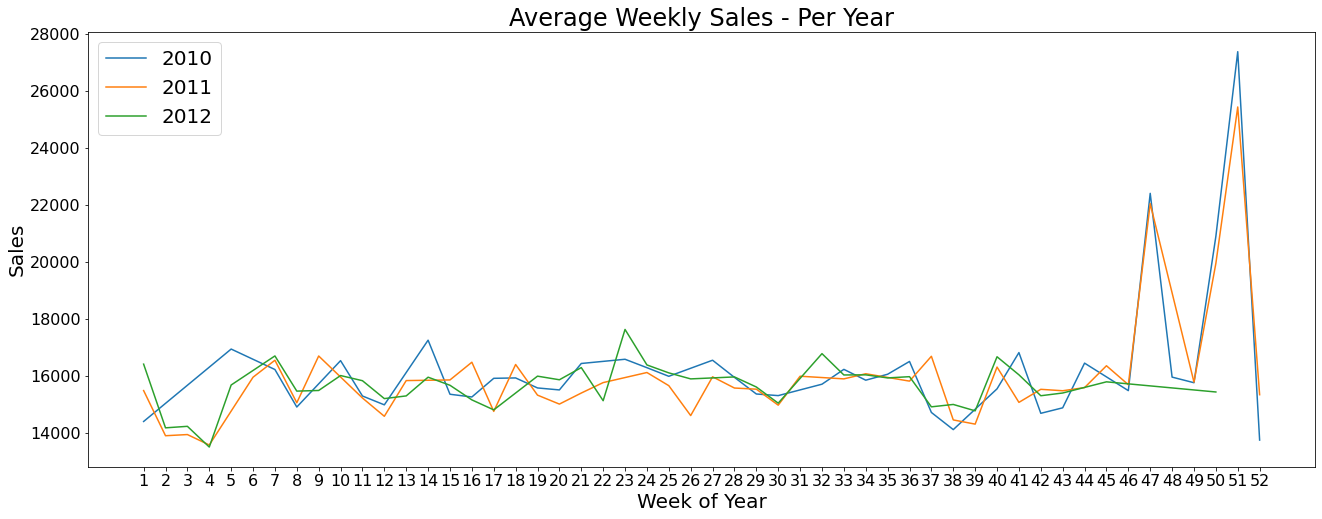

In [25]:
# Average Sales per week during each year
weekly_sales_2010 = df[df.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean() # getting avg weekly sales for year 2010
weekly_sales_2011 = df[df.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean() # getting avg weekly sales for year 2011
weekly_sales_2012 = df[df.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean() # getting avg weekly sales for year 2012
# print(weekly_sales_2010)
plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values,label="2010") # x-axis= week number , y-axis= values i.e. avg sales per week
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values,label="2011")
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values,label="2012")

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20)
plt.ylabel('Sales', fontsize=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(fontsize=20);

# Observations: Sales in last few weeks are very high due to Christmas, Thanks Giving, New Year for year 2010, 2011 but not high for year 2012.

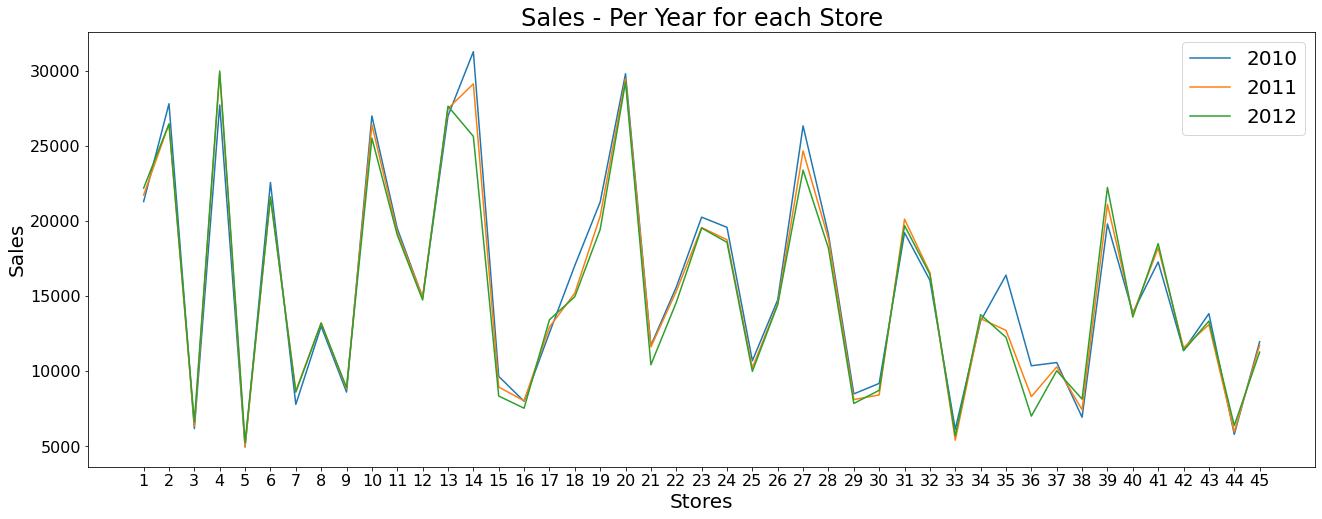

In [26]:
# Average Sales for each Stores during each Year
store_sales_2010 = df[df.Year==2010].groupby('Store')['Weekly_Sales'].mean()
store_sales_2011 = df[df.Year==2011].groupby('Store')['Weekly_Sales'].mean()
store_sales_2012 = df[df.Year==2012].groupby('Store')['Weekly_Sales'].mean()
#store_sales_2010
plt.figure(figsize=(22,8))
plt.plot(store_sales_2010.index, store_sales_2010.values,label="2010")
plt.plot(store_sales_2011.index, store_sales_2011.values,label="2011")
plt.plot(store_sales_2012.index, store_sales_2012.values,label="2012")
plt.xticks(np.arange(1, 46, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Stores', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title("Sales - Per Year for each Store", fontsize=24)
plt.legend(fontsize=20);

# Observations: Stores 2,4,6,13,1420,27 and 28 have very high sales 
# Stores 3,5,33 and 44 have very low sales

Text(0.5, 1.0, 'LinePlot showing the change in fuel price over the span of 3 years')

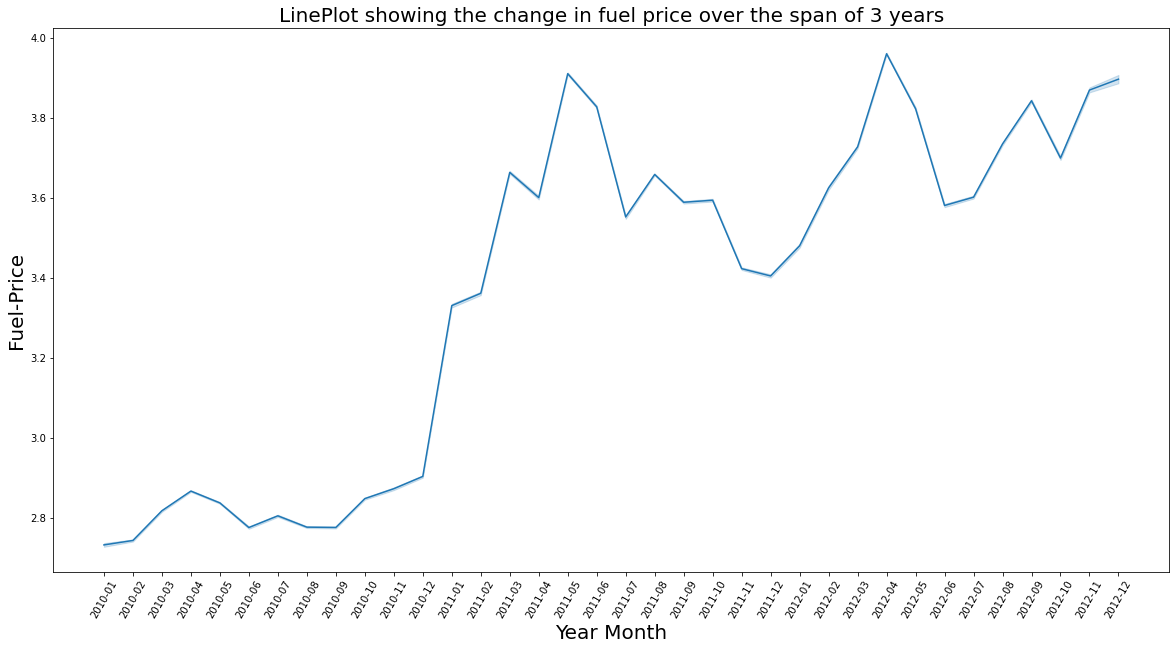

In [27]:
# Reference: https://www.delftstack.com/howto/seaborn/seaborn-font-size/
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 60)
p=sns.lineplot(data = df, x = 'Year-Month',y = 'Fuel_Price')
p.set_xlabel("Year Month", fontsize = 20)
p.set_ylabel("Fuel-Price", fontsize = 20)
plt.title('LinePlot showing the change in fuel price over the span of 3 years', fontsize=20)

# Observations: For the year 2010 Fuel Price was low. Year 2011 the prices was very high spike with decreasing in between. 
# For month of November and December 2012 the prices were very high compared to prices from previous years for same months.

Text(0.5, 1.0, 'BarPlot showing the change in fuel price with respect the type of the store with holidays grouped')

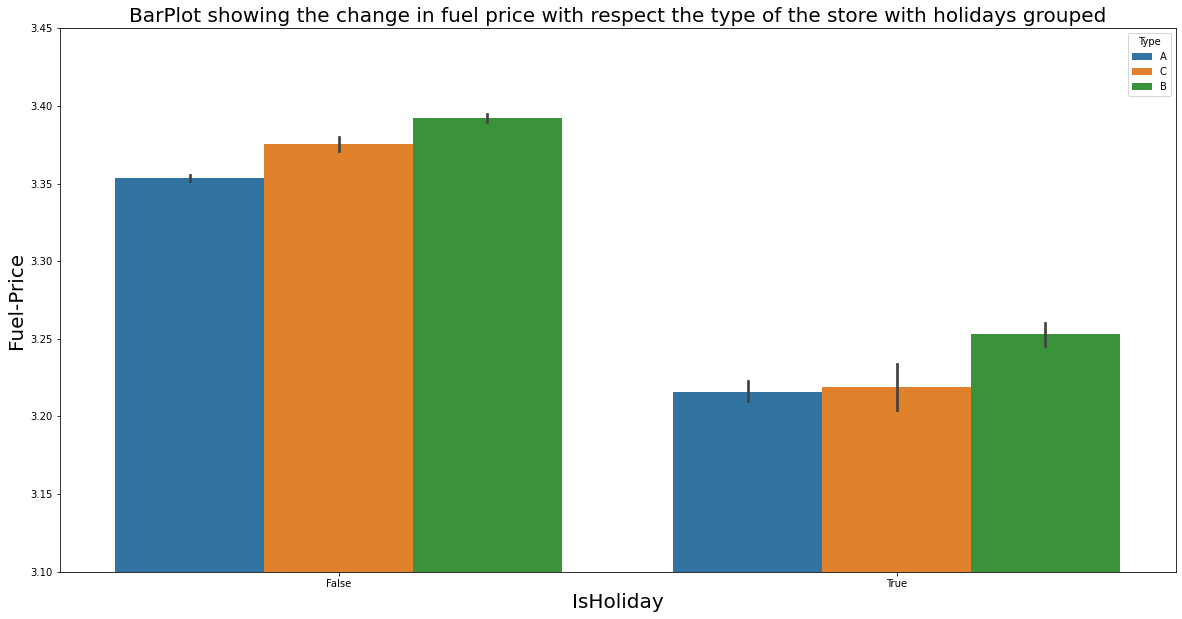

In [28]:
plt.subplots(figsize = (20,10))
plt.ylim(3.1,3.45)
plots = sns.barplot(data = df, x = 'IsHoliday', y = 'Fuel_Price', hue = 'Type')
plots.set_xlabel("IsHoliday", fontsize = 20)
plots.set_ylabel("Fuel-Price", fontsize = 20)
plt.title('BarPlot showing the change in fuel price with respect the type of the store with holidays grouped',fontsize=20)

# Observations: It is evident that when there is Holiday the fuel prices are low.
# Type B fuel prices are high while Type A prices are low among all.

Text(0.5, 1.0, 'Barplot showing the observation counts for each recorded month')

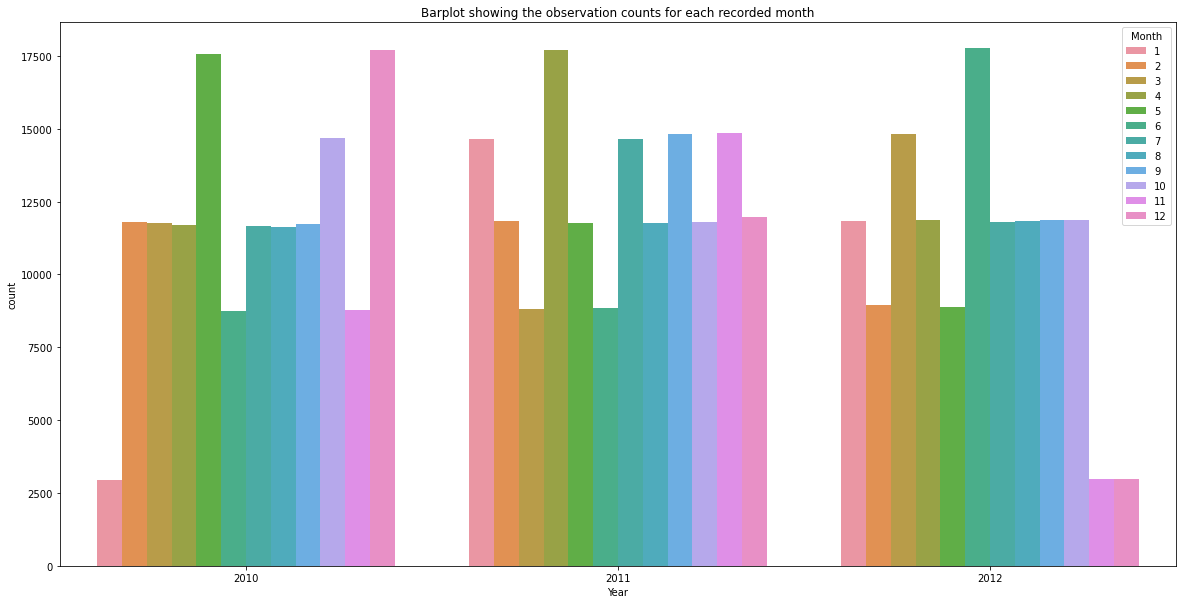

In [29]:
plt.subplots(figsize = (20,10))
sns.countplot(data = df,x='Year',hue='Month')
plt.title('Barplot showing the observation counts for each recorded month')

# Observations: There is no significant pattern in the data points spread each months in the dataset.

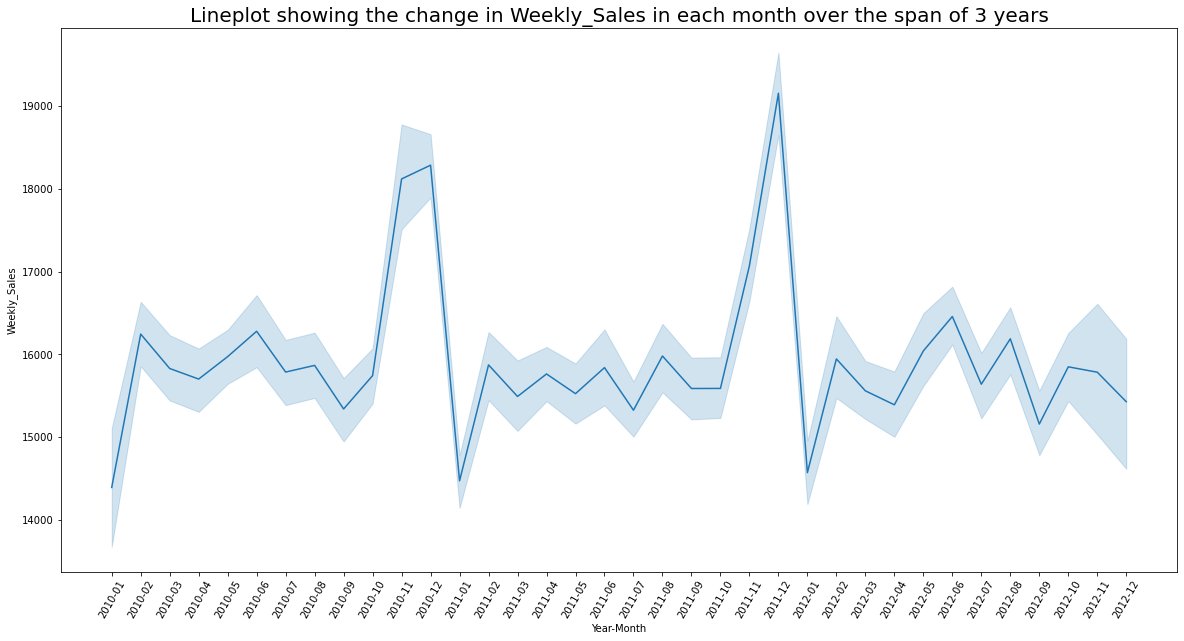

In [30]:
plt.subplots(figsize = (20,10))
sns.lineplot(data = df, x = 'Year-Month', y = 'Weekly_Sales')
plt.xticks(rotation = 60)
a=plt.title('Lineplot showing the change in Weekly_Sales in each month over the span of 3 years',fontsize=20)


# Observations: Sales is high during October, November and December because of holidays like Christmas, New year, Thanksgiving.
# But in 2012 the sales was very low among these three months even the number of orders were also low.

In [31]:
# to get weekly sales of every stores 
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

In [32]:
df_average_sales_week

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


Text(0, 0.5, 'Weekly Sales')

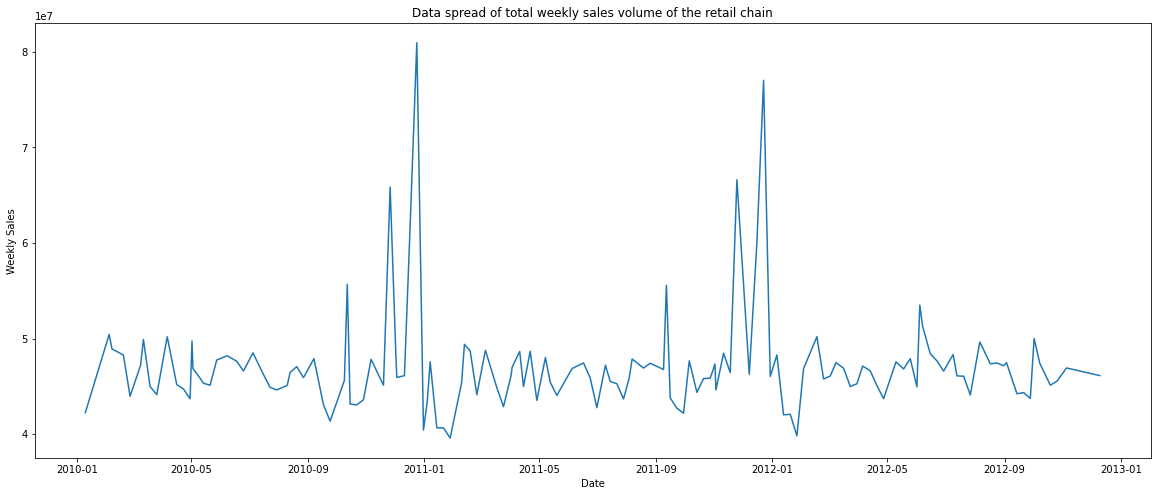

In [33]:
plt.figure(figsize=(20,8))
plt.plot(df_average_sales_week['Date'], df_average_sales_week['Weekly_Sales'])
plt.title('Data spread of total weekly sales volume of the retail chain')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

# Observations: Weekly sales is based on seasonality (constant high and low) i.e. During October-November sales are high rest of the months sales are low

In [34]:
# Sales based on Type of stores
df_top_stores = df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [35]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

# Observations: Type A stores sales are high while Type C stores sales are low because number of orders are high for Type A while Type C it is lowest.

In [36]:
df['Temperature']

120124    68.74
373364    62.01
373365    62.01
259245    70.19
259244    70.19
          ...  
58844     65.43
58845     65.43
58846     65.43
58848     65.43
380761    47.35
Name: Temperature, Length: 421570, dtype: float64

In [37]:
r = 5 
# Divide the temperature by 5 so that it is multiple of 5
df['Temperature_r'] = df.sort_values(by=['Temperature']).Temperature.apply(lambda x : x - x %r)

In [38]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Type,Size,Dept,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear,Temperature_r
120124,13,2010-01-10,68.74,2.853,0.00,0.0,0.00,0.00,0.00,126.234600,...,A,219622,14,20922.18,2010,1,2010-01,10,1,65.0
373364,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,A,155083,74,9872.41,2010,1,2010-01,10,1,60.0
373365,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,A,155083,79,10840.77,2010,1,2010-01,10,1,60.0
259245,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,A,204184,98,9837.86,2010,1,2010-01,10,1,70.0
259244,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,A,204184,97,19095.76,2010,1,2010-01,10,1,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58844,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,A,202505,83,3690.95,2012,12,2012-12,10,50,65.0
58845,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,A,202505,85,1645.71,2012,12,2012-12,10,50,65.0
58846,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,A,202505,87,44915.71,2012,12,2012-12,10,50,65.0
58848,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,A,202505,91,44775.89,2012,12,2012-12,10,50,65.0


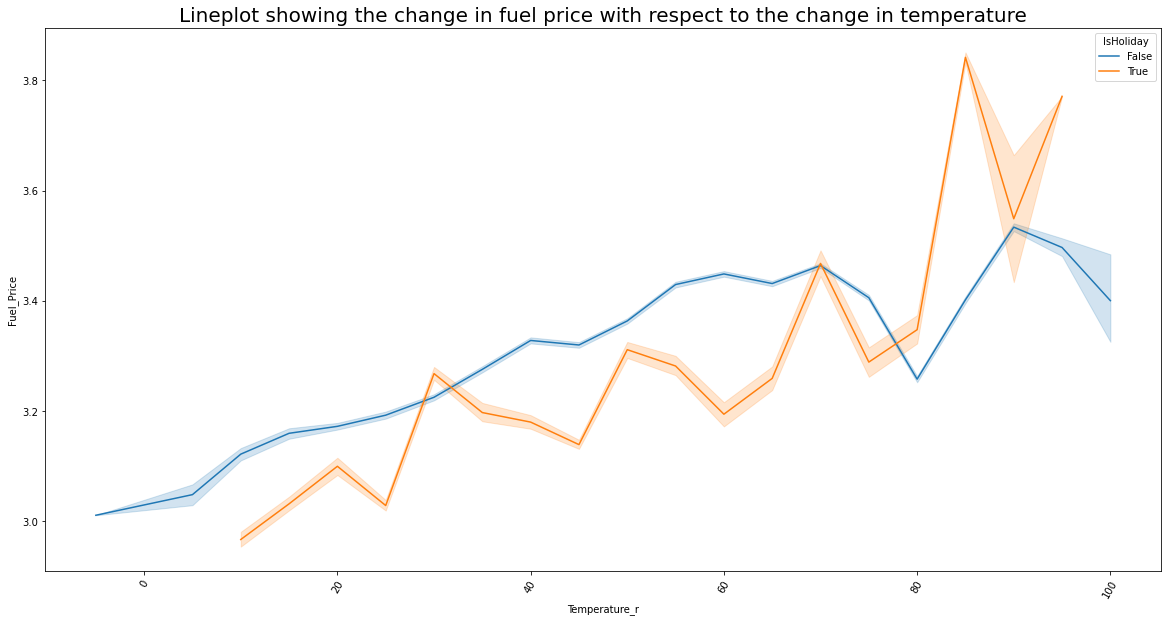

In [39]:
plt.subplots(figsize = (20,10))
sns.lineplot(data = df, x = 'Temperature_r', y = 'Fuel_Price',hue = 'IsHoliday')
plt.xticks(rotation = 60)
a=plt.title('Lineplot showing the change in fuel price with respect to the change in temperature',fontsize=20)

# Observations: Fuel price increases as the temperature increases when There is NO HOLIDAY.
# Fuel Price increases unevenly when there is HOLIDAY as temperature increases

Text(0.5, 1.0, 'Lineplot showing the change in CPI with respect to the change in temperature')

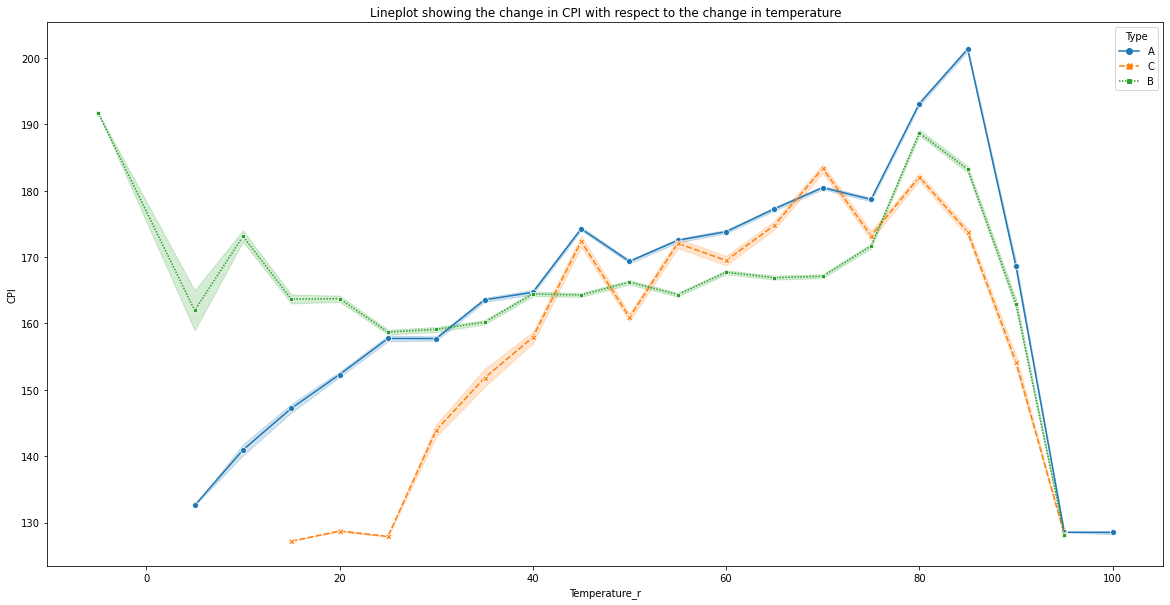

In [40]:
# Plotting CPI VS Temperature change 
plt.subplots(figsize = (20,10))
sns.lineplot(data = df, x = 'Temperature_r', y = 'CPI', hue = 'Type',style = 'Type', markers = True, ci = 68)
plt.title('Lineplot showing the change in CPI with respect to the change in temperature')

# Observations: As temperature increases Consumer Price Index also increases and lastly decreases for all 3 Type of stores

In [41]:
# Monthly Sales based on Different Types of Stores
df_month = df.groupby(by=['Month','Type'], as_index=False)['Weekly_Sales'].sum()

In [42]:
df_month.head()

,Month,Type,Weekly_Sales
0,1,A,2.749285e+08
1,1,B,1.234046e+08
2,1,C,2.809324e+07
3,2,A,3.351876e+08
4,2,B,1.559737e+08


Text(0.5, 1.0, 'Monthly Sales for Different Types of Stores')

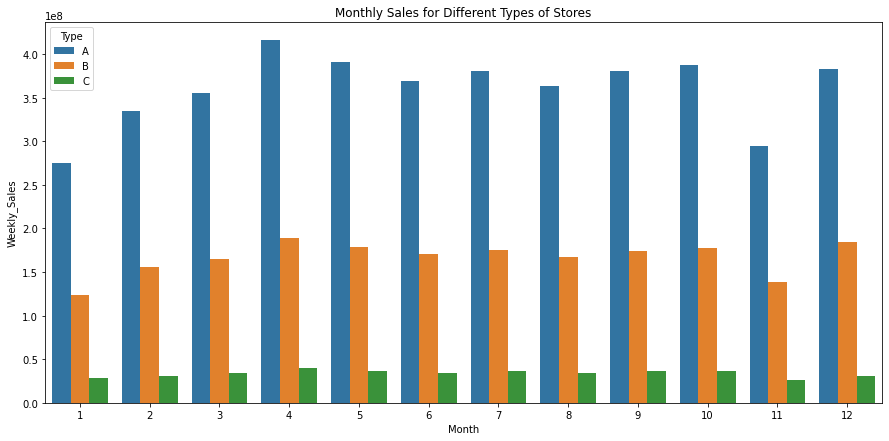

In [43]:
plt.figure(figsize=(15, 7))
sns.barplot(x=df_month['Month'], y=df_month['Weekly_Sales'],hue=df_month['Type'])
plt.title("Monthly Sales for Different Types of Stores")

# Observations: Type A has most sales while Type C has less sales.
# Sales are high during summers

In [44]:
# Department Sales
df_dept = df.groupby(by=['Dept'], as_index=False)['Weekly_Sales'].sum()

In [45]:
df_dept.head()

,Dept,Weekly_Sales
0,1,1.236388e+08
1,2,2.806112e+08
2,3,7.589245e+07
3,4,1.671467e+08
4,5,1.356074e+08


Text(0.5, 1.0, 'Sales for Different Types of Department')

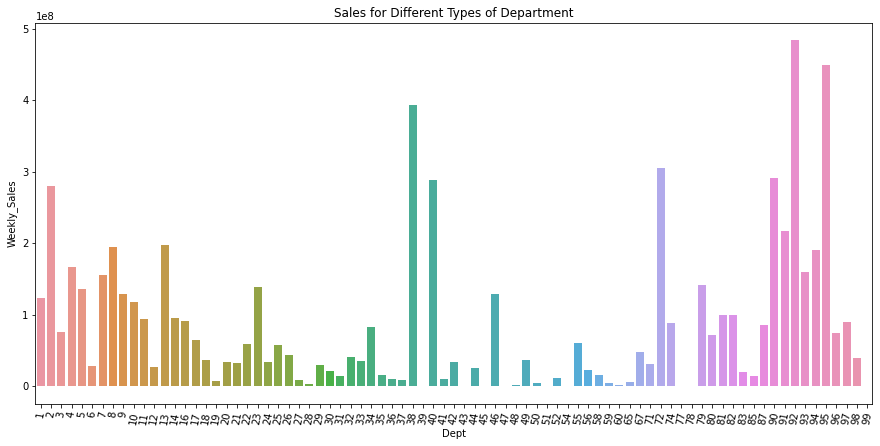

In [46]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 80)
sns.barplot(x=df_dept['Dept'], y=df_dept['Weekly_Sales'])
plt.title("Sales for Different Types of Department")

# Observations: Department 38,92 and 95 has most sales
# There are few department which have very very few sales

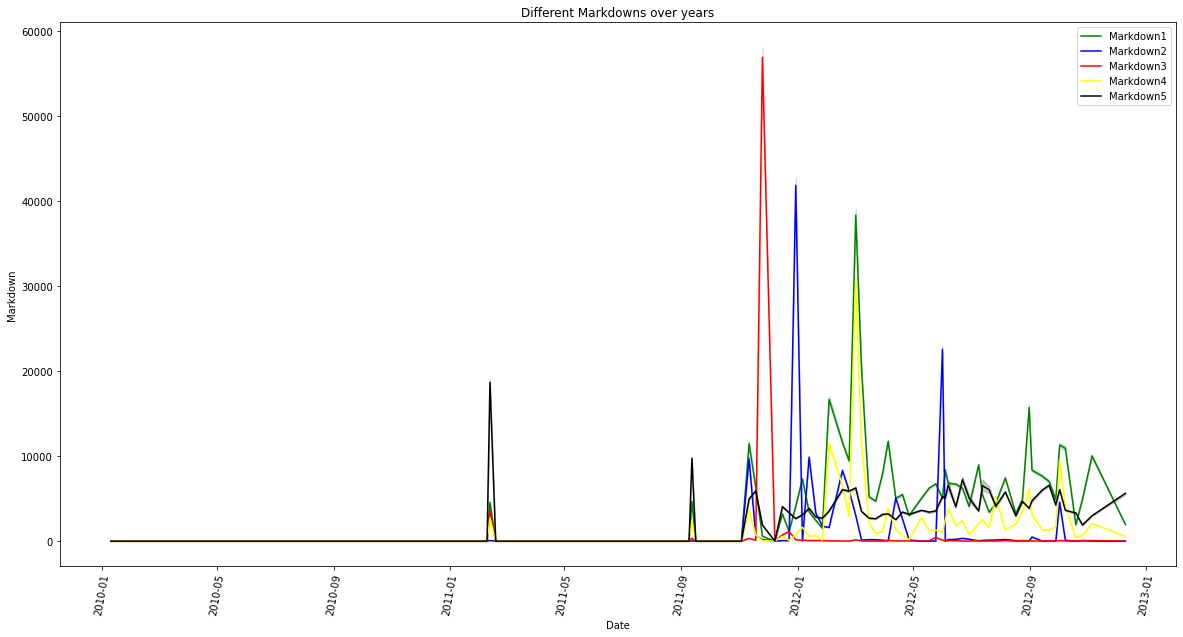

In [47]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 80)
sns.lineplot(df['Date'], df['MarkDown1'], color='green',label="Markdown1")
sns.lineplot(df['Date'], df['MarkDown2'], color='blue',label="Markdown2")
sns.lineplot(df['Date'], df['MarkDown3'], color='red',label="Markdown3")
sns.lineplot(df['Date'], df['MarkDown4'], color='yellow',label="Markdown4")
sns.lineplot(df['Date'], df['MarkDown5'], color='black',label="Markdown5")
plt.title("Different Markdowns over years")
plt.ylabel("Markdown")
plt.legend()

# Observations: Markdowns were not recorded before 2011. Since february has Super Bowl hence there was amarkdown sale given.Markdown 5 has huge during 2011
# In September there is labor Day hence there was a markdown, Markdown 5 has huge during 2011
# In November there is Thanksgiving so before that markdown, Markdown 3 was very huge during 2011
# In December Christmas, markdown 2 was huge during 2011
# For 2012, Markdown 1,markdown 4 and markdown 5 has promotional sale throughout the year.
# 2012 was uneven and random compared to 2011. There were different markdown throughout while there were some markdown unevenly and markdown 3 was not there.

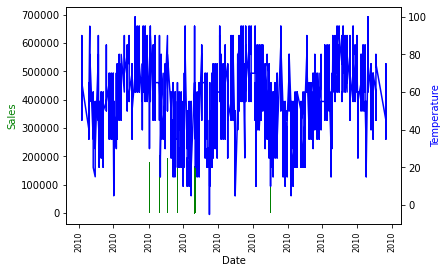

In [38]:
# Reference: https://www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = (20,9)
ax2 = ax1.twinx()
ax1.bar(df['Date'], df['Weekly_Sales'], color='yellow')
ax2.plot(df['Date'], df['Temperature_r'], color='pink')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='g')
ax2.set_ylabel('Temperature', color='b')
ax1.set_xticklabels(df['Year'], rotation='vertical', size=8)

fig.show()

In [39]:
# Correlation between Temperature and Weekly_Sales
from scipy.stats import spearmanr
coef, p = spearmanr(df["Weekly_Sales"], df["Temperature"])
print(coef)

-0.01975161534039547


# Observations: Weekly_Sales and Temperature are very very slightly negatively correlated

In [48]:
df1=df.copy()

In [49]:
df1=df1.set_index("Date")

In [50]:
df1

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Type,Size,Dept,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear,Temperature_r
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-10,13,68.74,2.853,0.00,0.0,0.00,0.00,0.00,126.234600,7.795,...,A,219622,14,20922.18,2010,1,2010-01,10,1,65.0
2010-01-10,40,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,5.287,...,A,155083,74,9872.41,2010,1,2010-01,10,1,60.0
2010-01-10,40,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,5.287,...,A,155083,79,10840.77,2010,1,2010-01,10,1,60.0
2010-01-10,27,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,8.021,...,A,204184,98,9837.86,2010,1,2010-01,10,1,70.0
2010-01-10,27,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,8.021,...,A,204184,97,19095.76,2010,1,2010-01,10,1,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-10,6,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,5.329,...,A,202505,83,3690.95,2012,12,2012-12,10,50,65.0
2012-12-10,6,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,5.329,...,A,202505,85,1645.71,2012,12,2012-12,10,50,65.0
2012-12-10,6,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,5.329,...,A,202505,87,44915.71,2012,12,2012-12,10,50,65.0


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

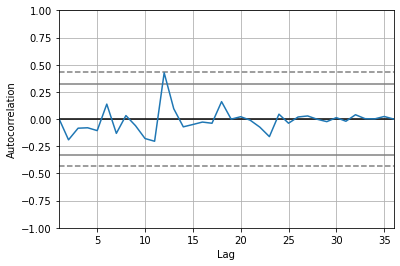

In [44]:
# AutoCorrelation of Weekly_Sales
pd.plotting.autocorrelation_plot(df1["Weekly_Sales"].resample("1m").mean())

#### Observations: There is peak at 12 months i.e. after 1 year. 
##### There is a peak after 6 months as well , then 18 months etc.
##### Grey line is confidence interval 90%
##### Dotted line is confidence interval 95%

# Modeling

# Trying base line models like Moving Average(MA), Weighted Moving Average, Exponential Moving Average

# Moving Average

In [199]:
# Setting Date as Index
df2=df.set_index("Date")


In [200]:
df2.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Type,Size,Dept,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear,Temperature_r
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-10,13,68.74,2.853,0.0,0.0,0.0,0.0,0.0,126.234600,7.795,...,A,219622,14,20922.18,2010,1,2010-01,10,1,65.0
2010-01-10,40,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,5.287,...,A,155083,74,9872.41,2010,1,2010-01,10,1,60.0
2010-01-10,40,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,5.287,...,A,155083,79,10840.77,2010,1,2010-01,10,1,60.0
2010-01-10,27,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,8.021,...,A,204184,98,9837.86,2010,1,2010-01,10,1,70.0
2010-01-10,27,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,8.021,...,A,204184,97,19095.76,2010,1,2010-01,10,1,70.0


In [201]:
 # Resampling the data into monthly, as the data is weekly resampling to montly sales
df2=df2["Weekly_Sales"].resample("W").mean()


In [202]:
df2=df2.fillna(0)

In [203]:
df2

Date
2010-01-10    14391.780535
2010-01-17        0.000000
2010-01-24        0.000000
2010-01-31        0.000000
2010-02-07    16935.103266
                  ...     
2012-11-18        0.000000
2012-11-25        0.000000
2012-12-02        0.000000
2012-12-09        0.000000
2012-12-16    15427.596739
Freq: W-SUN, Name: Weekly_Sales, Length: 154, dtype: float64

In [204]:
df2.to_csv("C:/Users/shwer/OneDrive/Desktop/Retail Analytics/s.csv")

In [205]:
# Opening csv file
df3=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/Retail Analytics/s.csv")

In [206]:
df3['Date']=pd.to_datetime(df3['Date'])

In [207]:
df3=df3.set_index("Date")

<b> Simple Moving Average =(t + (t-1) + (t-2)+.....+(t-n))/n </b>


In [208]:
# To find Moving average window=3 means current datapoint plus previous 2 datapoints to consider
# Shift by 1 because taking current datapoint with previous 2 datapoints to predict the next future datapoint
df3["MA_3_Rolling"]=df3['Weekly_Sales'].rolling(window=3).mean().shift(1)

<AxesSubplot:xlabel='Date'>

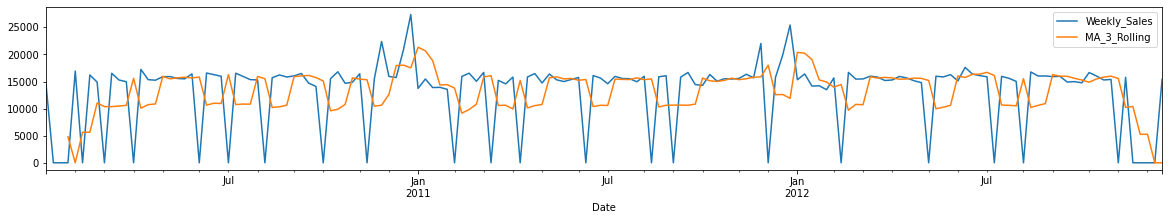

In [209]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
df3.plot()

<b> Observations:Prediction are very good but it is able to capture the fluctuations ups and downs.</b>

### Weighted Moving Average=(t* weighting factor) + ((t-1)*weighting factor-1) +((t-n)*weighting factor-n)/n
<b>Putting a higher weightage to recent points and less weight to old points or other way round which can be useful in better predicting the sales </b>

In [210]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

In [211]:
df3["WMA_Rolling_3"]=df3["Weekly_Sales"].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

<AxesSubplot:xlabel='Date'>

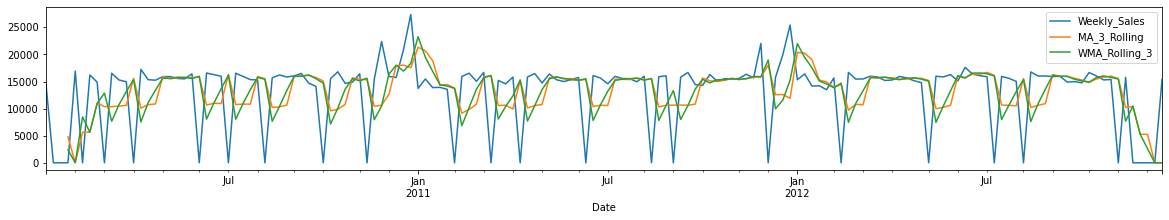

In [212]:
df3.plot()

# Observations: Weighted Moving Average gives better results and captures the trends better than Simple moving Average

# Exponential Moving Average
# Refer: https://www.investopedia.com/terms/e/ema.asp
<b><br>Adapts quickly to datapoint changes as it takes Exponential Moving Average as the next input rather than time (t-1) and (t-2).</br></b>
<b><br> In EMA takes the previous time period calculates the EMA and takes EMA as next input </br></b>
<b><br>Exponential Moving Average=(Close - Previous EMA) * (2/(Span+1)) + previous EMA</br></b>

In [213]:
df3["ewm_3"]=df3["Weekly_Sales"].ewm(span=3,adjust=False,min_periods=0).mean().shift(1)

<AxesSubplot:xlabel='Date'>

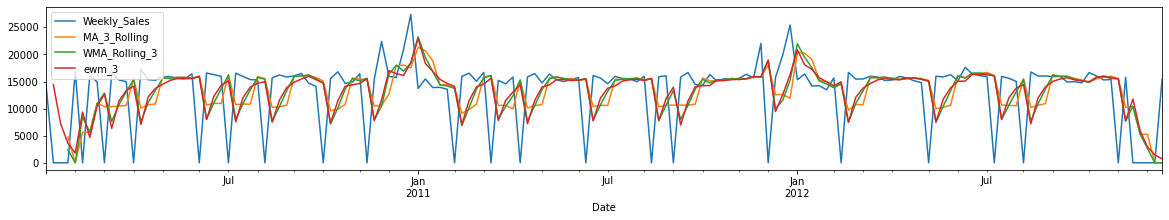

In [214]:
df3.plot()

# Observations: Exponential Moving Average is close to actual predictions but sometimes Weighted Moving Average performs well

# Exponential Smoothing
<b>Has a additional parameter called alpha which controls the rate at which we see observations at previous time steps and it allows decay those values exponentially</b>

In [215]:
df3["esm_3_7"]=df3["Weekly_Sales"].ewm(alpha=0.7,adjust=False,min_periods=3).mean().shift(1)

<AxesSubplot:xlabel='Date'>

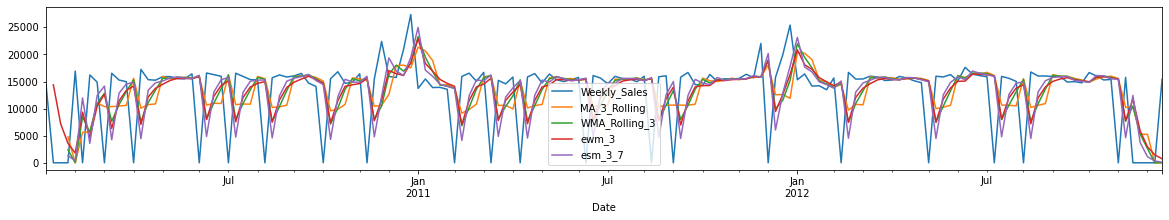

In [216]:
df3.plot()

# Observations: Exponential Smoothing predicts better rest of the models

In [217]:
# Finding RMSE for each model
rmse_ma=((df3["Weekly_Sales"]-df3["MA_3_Rolling"])**2).mean()**0.5
rmse_wma=((df3["Weekly_Sales"]-df3["WMA_Rolling_3"])**2).mean()**0.5
rmse_ewm=((df3["Weekly_Sales"]-df3["ewm_3"])**2).mean()**0.5
rmse_esm_3_7=((df3["Weekly_Sales"]-df3["esm_3_7"])**2).mean()**0.5


In [218]:
rmse_ma,rmse_wma,rmse_ewm,rmse_esm_3_7

(7000.255986656489, 7219.530075706015, 7151.526311217249, 7660.976189679245)

# Exponential Weighted Average has less errors and makes better predictions than rest of Moving Average Models

# Time Series Decomposition

# KPSS

<b><br>Null Hypothesis: Data is Stationary</b></br>
<b><br>Alternate Hypothesis: Data is Not Stationary </b></br>



In [163]:
from statsmodels.tsa.stattools import kpss

In [219]:
stats,p,lags,critical_values=kpss(df3["Weekly_Sales"],'ct') #ct: means trend 
#lags: how much lags to consider

In [220]:
print(f'Test Stats: {stats}')
print(f'p-value: {p}')
print(f'Critical values: {critical_values}')

if p<0.05:
    print("Series is not Stationary")
else:
    print("Series is Stationary")

Test Stats: 0.15812258048815822
p-value: 0.03989784959320147
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


# Observations: Time Series is not stationary

# Augmented Duckey Fuller Test

<b><br>Null Hypothesis: Series is not stationary</b></br>
<b><br>Alternate Hypothesis: Series is Stationary </b></br>

In [221]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df3["Weekly_Sales"])

In [222]:
print(f'Test Stats: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical values: {result[4]}')

if result[1]>0.05:
    print("Series is not Stationary")
else:
    print("Series is Stationary")

Test Stats: -11.989707259844405
p-value: 3.5445727808614497e-22
Critical values: {'1%': -3.473829775724492, '5%': -2.880622899711496, '10%': -2.5769448985432954}
Series is Stationary


# AUTO ARIMA

In [226]:
import pmdarima as pm
model=pm.auto_arima(df3['Weekly_Sales'],m=52,seasonal=True,start_p=1,start_q=1, max_p=52,max_d=8, max_q=52,test='kpss', error_action='ignore',suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=5.21 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=3135.049, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3138.435, Time=1.01 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3138.432, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=3392.056, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=3136.955, Time=0.42 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=3136.262, Time=0.33 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=3138.262, Time=0.72 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=3136.962, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=3137.497, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=3139.294, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[52] intercept
Total fit time: 8.244 seconds


 # AIC: Estimate between true likelihood of data and fiited likelihood.(difference between them)


In [227]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  154
Model:                        SARIMAX   Log Likelihood               -1565.525
Date:                Wed, 08 Sep 2021   AIC                           3135.049
Time:                        21:56:58   BIC                           3141.123
Sample:                             0   HQIC                          3137.516
                                - 154                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.316e+04    897.342     14.664      0.000    1.14e+04    1.49e+04
sigma2      3.957e+07   6.83e+06      5.790      0.000    2.62e+07     5.3e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                51.09
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -1.36
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# AR order is 0, data is stationary hence d=0

In [230]:
train=df3[(df3.index.get_level_values(0) >='2010-01-10') & (df3.index.get_level_values(0) <'2012-01-22')]
test=df3[(df3.index.get_level_values(0) >='2012-01-22')]
          

In [231]:
test

,Weekly_Sales,MA_3_Rolling,WMA_Rolling_3,ewm_3,esm_3_7
Date,,,,,
2012-01-22,14221.357405,15302.003604,15108.022213,15709.371259,14953.963839
2012-01-29,13494.232612,14931.737786,14567.699113,14965.364332,14441.139335
2012-02-05,15672.586946,13961.285510,13848.946526,14229.798472,13778.304629
2012-02-12,0.000000,14462.725654,14704.597245,14951.192709,15104.302251
2012-02-19,16693.401051,9722.273186,7473.234417,7475.596355,4531.290675
2012-02-26,15458.124475,10788.662666,10958.798350,12084.498703,13044.767938
2012-03-04,15480.553608,10717.175175,13293.529254,13771.311589,14734.117514
2012-03-11,16004.684719,15877.359711,15675.218471,14625.932598,15256.622780
2012-03-18,15823.719615,15647.787600,15738.880974,15315.308658,15780.266137


In [233]:
model.fit(train['Weekly_Sales'])

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 52),
      suppress_warnings=True)

In [234]:
forecast=model.predict(n_periods=48, return_conf_int=True)

In [235]:
forecast_df=pd.DataFrame(forecast[0],index=test.index,columns=["Prediction"])

In [236]:
forecast_df

,Prediction
Date,
2012-01-22,13355.793461
2012-01-29,13355.793461
2012-02-05,13355.793461
2012-02-12,13355.793461
2012-02-19,13355.793461
2012-02-26,13355.793461
2012-03-04,13355.793461
2012-03-11,13355.793461
2012-03-18,13355.793461


<AxesSubplot:xlabel='Date'>

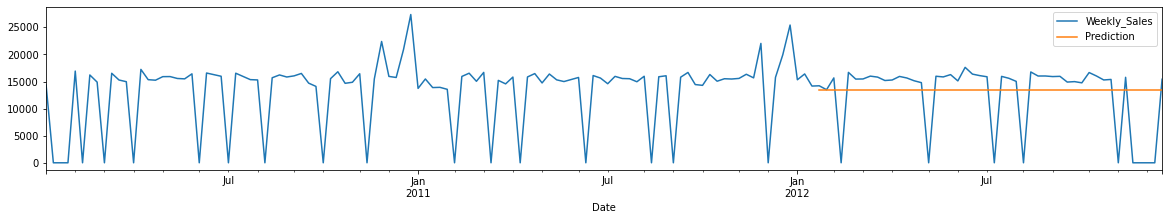

In [237]:
pd.concat([df3["Weekly_Sales"],forecast_df],axis=1).plot()

# Osbervations: As the Prediction of Sales is from Jul 2012 - Dec 2012 and since the sales are high for year 2010 and 2011 for the months Nov and Dec. SO here it also predicted high sales for month Nov and December but the actual sales were very low

In [177]:
# Taking confidence interval and predicting for 4 future months
forecast1=model.predict(n_periods=10, return_conf_int=True)

In [178]:
forecast_range=pd.date_range(start='2012-07-31', periods=10, freq='M')

In [179]:
forecast1_df=pd.DataFrame(forecast1[0],index=forecast_range,columns=["Prediction"])

<AxesSubplot:>

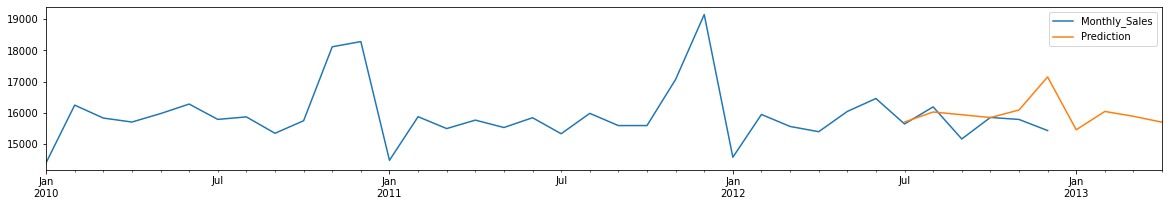

In [180]:
pd.concat([df3["Monthly_Sales"],forecast1_df],axis=1).plot()

In [181]:
lower=pd.Series(forecast1[1][:,0],index=forecast_range)
upper=pd.Series(forecast1[1][:,1],index=forecast_range)

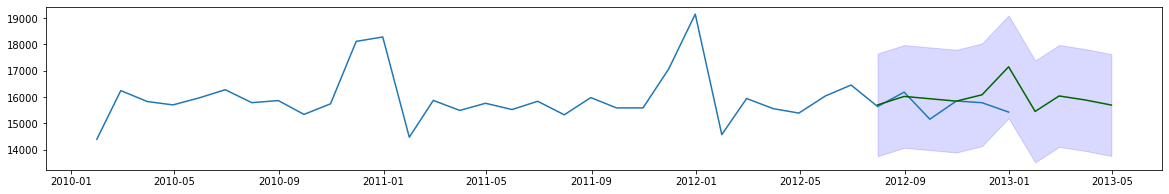

In [182]:
plt.plot(df3["Monthly_Sales"])
plt.plot(forecast1_df,color='darkgreen')
plt.fill_between(forecast_range,lower,upper,color='b',alpha=0.15)


# Observations: Sales Value with lower and upper bond range interval 

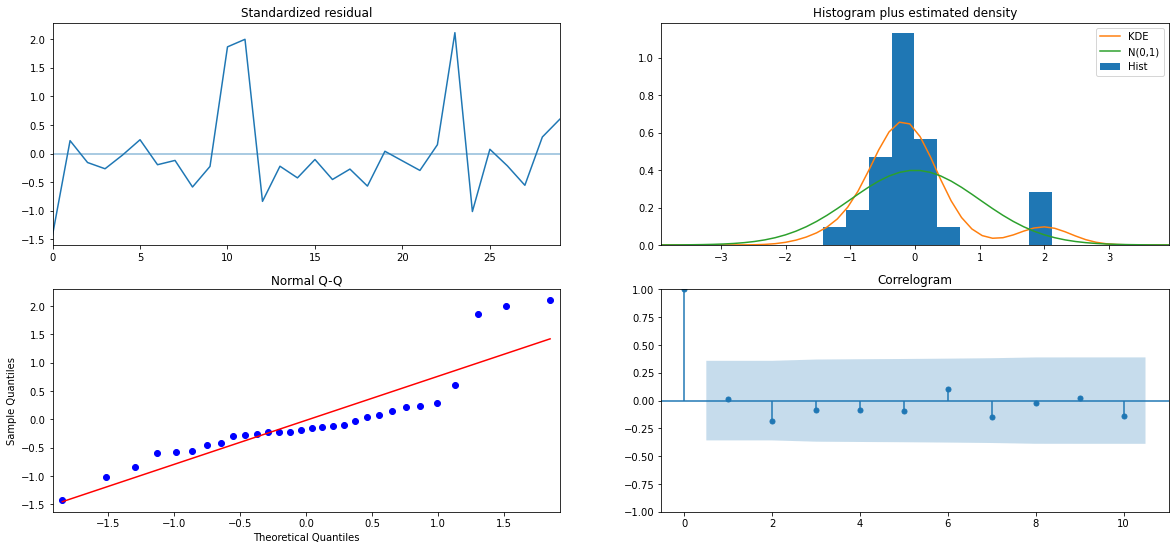

In [185]:
plt.rcParams["figure.figsize"] = (20,9)
out=model.plot_diagnostics()

##### Observations: Residual i.e. Error here it doesn't have any pattern it is in constant zero mean there are ups and down suggesting ok not that bad model.
#### It is not normally distributed as majority of points doesn't lie on the line of QQ Plot

# LSTM

In [135]:
a=df.groupby(by=["Date"])["Weekly_Sales"].sum()

In [136]:
a.isna().sum()

0

In [137]:
type(a)

pandas.core.series.Series

In [138]:
a.sum()

6737218987.110001

In [139]:
#he data into monthly, as the data is weekly resampling to montly sales
r=df.set_index("Date")
w=r["Weekly_Sales"].resample("W").sum()

In [140]:
w.sum()

6737218987.11

In [141]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear,IsHoliday_True,Type_A,Type_B
120124,13,2010-01-10,68.74,2.853,0.00,0.0,0.00,0.00,0.00,126.234600,...,14,20922.18,2010,1,2010-01,10,1,0,1,0
373364,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,74,9872.41,2010,1,2010-01,10,1,0,1,0
373365,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,79,10840.77,2010,1,2010-01,10,1,0,1,0
259245,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,98,9837.86,2010,1,2010-01,10,1,0,1,0
259244,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,97,19095.76,2010,1,2010-01,10,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58844,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,83,3690.95,2012,12,2012-12,10,50,0,1,0
58845,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,85,1645.71,2012,12,2012-12,10,50,0,1,0
58846,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,87,44915.71,2012,12,2012-12,10,50,0,1,0
58848,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,91,44775.89,2012,12,2012-12,10,50,0,1,0


In [142]:
prac=df.copy()

In [143]:
s=prac.groupby("Date").agg({"Weekly_Sales":"mean","Temperature":"mean","Fuel_Price":"mean","MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean","CPI":"mean","Unemployment":"mean"})

In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(s)

In [145]:
data_scaled

array([[6.46440638e-02, 7.59985229e-01, 4.48701791e-02, ...,
        0.00000000e+00, 1.01735091e-01, 9.10358115e-01],
       [2.59598693e-01, 4.37416635e-01, 1.14662461e-01, ...,
        0.00000000e+00, 3.37902423e-02, 9.14710153e-01],
       [2.35915534e-01, 8.97640146e-01, 9.02907559e-02, ...,
        0.00000000e+00, 6.47156904e-02, 8.73646887e-01],
       ...,
       [1.36663079e-01, 5.89922651e-01, 8.44121368e-01, ...,
        1.01235294e-01, 9.87798595e-01, 6.53416624e-04],
       [1.64916978e-01, 6.62892307e-01, 9.03895084e-01, ...,
        1.59751948e-01, 8.63231909e-01, 2.84278371e-01],
       [1.39246619e-01, 5.35332845e-01, 9.24452478e-01, ...,
        3.00257999e-01, 9.81395295e-01, 6.43256073e-03]])

In [146]:
features=data_scaled # all variables as features
target=data_scaled[:,0] # considering 1 column i.e. Weekly Sales as target . Here Weekly_Sales is both input as well as target
# taking previous weekly sales to predict future weekly sales value

In [147]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
TimeseriesGenerator(features, target, length=4,sampling_rate=1,batch_size=1)[0]

(array([[[0.06464406, 0.75998523, 0.04487018, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.10173509, 0.91035811],
         [0.25959869, 0.43741663, 0.11466246, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.03379024, 0.91471015],
         [0.23591553, 0.89764015, 0.09029076, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.06471569, 0.87364689],
         [0.19607722, 0.138841  , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.02957875, 0.9972498 ]]]),
 array([0.1012151]))

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)


In [149]:
x_train.shape

(114, 10)

In [150]:
x_test.shape

(29, 10)

In [151]:
win_length=8 # 4 months data 
batch_size=16
num_features=10 # input features
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [152]:
train_generator[0]

(array([[[0.06464406, 0.75998523, 0.04487018, ..., 0.        ,
          0.10173509, 0.91035811],
         [0.25959869, 0.43741663, 0.11466246, ..., 0.        ,
          0.03379024, 0.91471015],
         [0.23591553, 0.89764015, 0.09029076, ..., 0.        ,
          0.06471569, 0.87364689],
         ...,
         [0.18978354, 0.88818491, 0.05079261, ..., 0.        ,
          0.07780272, 0.87779918],
         [0.24702573, 0.2186779 , 0.16538886, ..., 0.        ,
          0.12220551, 0.90787074],
         [0.12910412, 0.37776002, 0.10756893, ..., 0.        ,
          0.04465372, 0.99459197]],
 
        [[0.25959869, 0.43741663, 0.11466246, ..., 0.        ,
          0.03379024, 0.91471015],
         [0.23591553, 0.89764015, 0.09029076, ..., 0.        ,
          0.06471569, 0.87364689],
         [0.19607722, 0.138841  , 0.        , ..., 0.        ,
          0.02957875, 0.9972498 ],
         ...,
         [0.24702573, 0.2186779 , 0.16538886, ..., 0.        ,
          0.12220551, 0.

In [173]:
from tensorflow.keras.layers import LSTM, Flatten, concatenate, Dense, Conv1D, LeakyReLU,Dropout,ReLU,BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(LSTM(256, input_shape= (win_length, num_features), return_sequences=True))
model.add(ReLU()) 
model.add(LSTM(128, return_sequences=True))
model.add(ReLU()) 
BatchNormalization()
model.add(Dropout(0.4)) 
model.add(LSTM(64, return_sequences=True))
model.add(ReLU()) 
model.add(Dropout(0.2)) 
model.add(LSTM(32, return_sequences=True))
model.add(ReLU()) 
BatchNormalization()
model.add(Dropout(0.2)) 
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2)) 
model.add(Dense(1))

In [174]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 8, 256)            273408    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 8, 256)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 8, 128)            197120    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 8, 128)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 128)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 8, 64)             49408     
_________________________________________________________________
re_lu_8 (ReLU)               (None, 8, 64)            

In [175]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [176]:
#from tensorflow.keras.callbacks import EarlyStopping
#earlystop = EarlyStopping(monitor='val_root_mean_squared_error', patience=5, verbose=1,mode='max')
model.compile(optimizer=tf.optimizers.Adam(),
              loss=rmse, metrics=[r_square, rmse])

history = model.fit(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 2 steps
Epoch 1/50
7/7 [==============================] - 6s 863ms/step - loss: 0.1444 - r_square: -4.8492 - rmse: 0.1478 - val_loss: 0.0496 - val_r_square: -2.7798 - val_rmse: 0.0548
Epoch 2/50
7/7 [==============================] - 0s 42ms/step - loss: 0.0955 - r_square: -1.1000 - rmse: 0.0979 - val_loss: 0.0444 - val_r_square: -3.0289 - val_rmse: 0.0432
Epoch 3/50
7/7 [==============================] - 0s 40ms/step - loss: 0.0800 - r_square: -0.5772 - rmse: 0.0818 - val_loss: 0.0362 - val_r_square: -0.9661 - val_rmse: 0.0438
Epoch 4/50
7/7 [==============================] - 0s 40ms/step - loss: 0.0797 - r_square: -0.5023 - rmse: 0.0821 - val_loss: 0.0298 - val_r_square: -0.1140 - val_rmse: 0.0360
Epoch 5/50
7/7 [==============================] - 0s 43ms/step - loss: 0.0769 - r_square: -0.2390 - rmse: 0.0796 - val_loss: 0.0296 - val_r_square: -0.5631 - val_rmse: 0.0319
Epoch 6/50
7/7 [==================

In [177]:
model.evaluate(test_generator, verbose=0)

  ...
    to  
  ['...']


[0.029577425681054592, -0.52977717, 0.03208636]

In [332]:
predictions=model.predict(test_generator) # to predict on test data

In [333]:
predictions

array([[0.15407659],
       [0.15877125],
       [0.15694453],
       [0.14362568],
       [0.12220395],
       [0.08399232],
       [0.09998789],
       [0.10536231],
       [0.10806355],
       [0.10206008],
       [0.10909943],
       [0.1085933 ],
       [0.10988507],
       [0.11692655],
       [0.12172413],
       [0.11819793],
       [0.1291962 ],
       [0.13187248],
       [0.13849144],
       [0.12879261],
       [0.1298514 ]], dtype=float32)

In [334]:
x_test[:,1:][win_length:]

array([[8.58522085e-01, 7.32965996e-01, 1.74779632e-01, 4.93277959e-03,
        8.66032967e-04, 6.06315331e-02, 2.15591306e-01, 8.63224924e-01,
        2.83339461e-01],
       [9.13552499e-01, 6.92923676e-01, 1.62589846e-01, 7.93288075e-03,
        1.91826186e-04, 7.85712686e-02, 3.86864256e-01, 8.60090390e-01,
        2.84131823e-01],
       [9.60835920e-01, 6.42231216e-01, 1.06222810e-01, 5.40888296e-03,
        1.03606118e-07, 2.51604643e-02, 2.71606519e-01, 8.60624813e-01,
        2.83779803e-01],
       [9.17948695e-01, 8.82312490e-01, 2.33930342e-01, 6.34365438e-04,
        1.34853458e-03, 6.66259228e-02, 1.89782529e-01, 9.27624447e-01,
        1.74925796e-01],
       [9.37269130e-01, 6.10736991e-01, 1.42105527e-01, 2.23517246e-03,
        2.62096920e-04, 8.27382132e-02, 3.48861279e-01, 8.77757440e-01,
        1.72397032e-01],
       [9.35127431e-01, 6.27515670e-01, 8.85928147e-02, 2.64256122e-03,
        3.63183528e-04, 5.19150433e-02, 3.22937513e-01, 8.92505631e-01,
        1.7

In [335]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [336]:
rev_trans=scaler.inverse_transform(df_pred) # inverse scaling to get original values 


In [337]:
rev_trans

array([[1.56335029e+04, 7.45187179e+01, 3.64394181e+00, 6.69724560e+03,
        2.06235815e+02, 4.92471042e+01, 1.84973348e+03, 4.02795119e+03,
        1.75033129e+02, 7.40645399e+00],
       [1.56986856e+04, 7.73846572e+01, 3.59093516e+00, 6.23015462e+03,
        3.31667795e+02, 1.09082270e+01, 2.39703499e+03, 7.22789045e+03,
        1.75004199e+02, 7.40775245e+00],
       [1.56733226e+04, 7.98471394e+01, 3.52383021e+00, 4.07026973e+03,
        2.26141340e+02, 5.89157859e-03, 7.67589915e+02, 5.07449869e+03,
        1.75009132e+02, 7.40717559e+00],
       [1.54883976e+04, 7.76136076e+01, 3.84164160e+00, 8.96379595e+03,
        2.65223432e+01, 7.66846359e+01, 2.03260901e+03, 3.54575877e+03,
        1.75627507e+02, 7.22879467e+00],
       [1.51909684e+04, 7.86198001e+01, 3.48213923e+00, 5.44523185e+03,
        9.34508841e+01, 1.49041836e+01, 2.52415922e+03, 6.51787047e+03,
        1.75167258e+02, 7.22465075e+00],
       [1.46604206e+04, 7.85082622e+01, 3.50435027e+00, 3.39471959e+03,
   

In [338]:
df_final=s[predictions.shape[0]*-1:]

In [339]:
df_final['Pred']=rev_trans[:,0]


<AxesSubplot:xlabel='Date'>

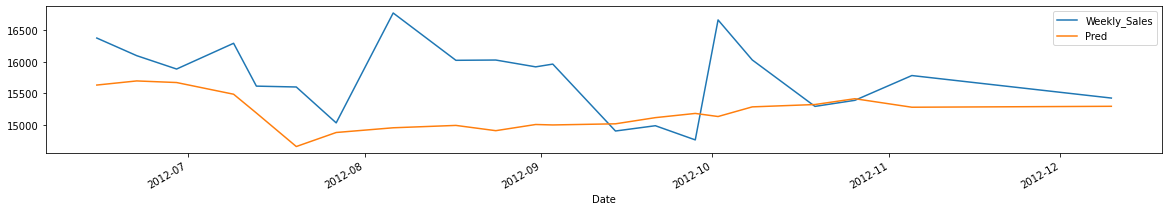

In [340]:
df_final[['Weekly_Sales','Pred']].plot()


In [1]:
# Building Machine Learning Models

In [84]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday,Type,Size,Dept,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear
120124,13,2010-01-10,68.74,2.853,0.0,0.0,0.0,0.0,0.0,126.234600,...,False,A,219622,14,20922.18,2010,1,2010-01,10,1
373364,40,2010-01-10,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,...,False,A,155083,74,9872.41,2010,1,2010-01,10,1
373365,40,2010-01-10,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,...,False,A,155083,79,10840.77,2010,1,2010-01,10,1
259245,27,2010-01-10,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,...,False,A,204184,98,9837.86,2010,1,2010-01,10,1
259244,27,2010-01-10,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,...,False,A,204184,97,19095.76,2010,1,2010-01,10,1


In [85]:
# Converting categorical column into numerical using Dummies and writing a function for it
def dummy_variables(dataframe,column_name):
    dataframe=pd.get_dummies(dataframe, prefix=[column_name], columns=[column_name])
    return dataframe

In [86]:
df=dummy_variables(df,'IsHoliday')

In [87]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Size,Dept,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear,IsHoliday_False,IsHoliday_True
120124,13,2010-01-10,68.74,2.853,0.00,0.0,0.00,0.00,0.00,126.234600,...,219622,14,20922.18,2010,1,2010-01,10,1,1,0
373364,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,155083,74,9872.41,2010,1,2010-01,10,1,1,0
373365,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,155083,79,10840.77,2010,1,2010-01,10,1,1,0
259245,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,204184,98,9837.86,2010,1,2010-01,10,1,1,0
259244,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,204184,97,19095.76,2010,1,2010-01,10,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58844,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,202505,83,3690.95,2012,12,2012-12,10,50,1,0
58845,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,202505,85,1645.71,2012,12,2012-12,10,50,1,0
58846,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,202505,87,44915.71,2012,12,2012-12,10,50,1,0
58848,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,202505,91,44775.89,2012,12,2012-12,10,50,1,0


In [88]:
# As to avoid dummy trap we will delete one dummy variable created keeping base variable and using a function to write it
def dummy_trap(dataframe,column_name_to_drop):
    dataframe.drop([column_name_to_drop], axis = 1,inplace=True) 
    return dataframe

In [89]:
dummy_trap(df,'IsHoliday_False')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Type,Size,Dept,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear,IsHoliday_True
120124,13,2010-01-10,68.74,2.853,0.00,0.0,0.00,0.00,0.00,126.234600,...,A,219622,14,20922.18,2010,1,2010-01,10,1,0
373364,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,A,155083,74,9872.41,2010,1,2010-01,10,1,0
373365,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,A,155083,79,10840.77,2010,1,2010-01,10,1,0
259245,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,A,204184,98,9837.86,2010,1,2010-01,10,1,0
259244,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,A,204184,97,19095.76,2010,1,2010-01,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58844,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,A,202505,83,3690.95,2012,12,2012-12,10,50,0
58845,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,A,202505,85,1645.71,2012,12,2012-12,10,50,0
58846,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,A,202505,87,44915.71,2012,12,2012-12,10,50,0
58848,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,A,202505,91,44775.89,2012,12,2012-12,10,50,0


In [90]:
df=dummy_variables(df,'Type')

In [91]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear,IsHoliday_True,Type_A,Type_B,Type_C
120124,13,2010-01-10,68.74,2.853,0.00,0.0,0.00,0.00,0.00,126.234600,...,20922.18,2010,1,2010-01,10,1,0,1,0,0
373364,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,9872.41,2010,1,2010-01,10,1,0,1,0,0
373365,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,10840.77,2010,1,2010-01,10,1,0,1,0,0
259245,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,9837.86,2010,1,2010-01,10,1,0,1,0,0
259244,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,19095.76,2010,1,2010-01,10,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58844,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,3690.95,2012,12,2012-12,10,50,0,1,0,0
58845,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,1645.71,2012,12,2012-12,10,50,0,1,0,0
58846,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,44915.71,2012,12,2012-12,10,50,0,1,0,0
58848,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,44775.89,2012,12,2012-12,10,50,0,1,0,0


In [92]:
dummy_trap(df,'Type_C')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear,IsHoliday_True,Type_A,Type_B
120124,13,2010-01-10,68.74,2.853,0.00,0.0,0.00,0.00,0.00,126.234600,...,14,20922.18,2010,1,2010-01,10,1,0,1,0
373364,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,74,9872.41,2010,1,2010-01,10,1,0,1,0
373365,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,79,10840.77,2010,1,2010-01,10,1,0,1,0
259245,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,98,9837.86,2010,1,2010-01,10,1,0,1,0
259244,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,97,19095.76,2010,1,2010-01,10,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58844,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,83,3690.95,2012,12,2012-12,10,50,0,1,0
58845,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,85,1645.71,2012,12,2012-12,10,50,0,1,0
58846,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,87,44915.71,2012,12,2012-12,10,50,0,1,0
58848,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,91,44775.89,2012,12,2012-12,10,50,0,1,0


In [93]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept,Weekly_Sales,Year,Month,Year-Month,Day,WeekOfYear,IsHoliday_True,Type_A,Type_B
120124,13,2010-01-10,68.74,2.853,0.00,0.0,0.00,0.00,0.00,126.234600,...,14,20922.18,2010,1,2010-01,10,1,0,1,0
373364,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,74,9872.41,2010,1,2010-01,10,1,0,1,0
373365,40,2010-01-10,62.01,2.717,0.00,0.0,0.00,0.00,0.00,132.756800,...,79,10840.77,2010,1,2010-01,10,1,0,1,0
259245,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,98,9837.86,2010,1,2010-01,10,1,0,1,0
259244,27,2010-01-10,70.19,2.840,0.00,0.0,0.00,0.00,0.00,136.629757,...,97,19095.76,2010,1,2010-01,10,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58844,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,83,3690.95,2012,12,2012-12,10,50,0,1,0
58845,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,85,1645.71,2012,12,2012-12,10,50,0,1,0
58846,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,87,44915.71,2012,12,2012-12,10,50,0,1,0
58848,6,2012-12-10,65.43,3.601,1905.34,0.0,13.83,559.50,8706.87,225.005473,...,91,44775.89,2012,12,2012-12,10,50,0,1,0


In [95]:
X=df.drop(['Date','Weekly_Sales','Year','Month','Year-Month','Day','WeekOfYear'],axis=1)
y=df['Weekly_Sales'].values

In [96]:
X.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,IsHoliday_True,Type_A,Type_B
120124,13,68.74,2.853,0.0,0.0,0.0,0.0,0.0,126.234600,7.795,219622,14,0,1,0
373364,40,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,5.287,155083,74,0,1,0
373365,40,62.01,2.717,0.0,0.0,0.0,0.0,0.0,132.756800,5.287,155083,79,0,1,0
259245,27,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,8.021,204184,98,0,1,0
259244,27,70.19,2.840,0.0,0.0,0.0,0.0,0.0,136.629757,8.021,204184,97,0,1,0


In [97]:
# Splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler_train_inp = StandardScaler()
scaled_inp_train=scaler_train_inp.fit_transform(X_train)
print(scaled_inp_train.shape)
scaled_inp_test=scaler_train_inp.transform(X_test)
print(scaled_inp_test.shape)


(337256, 15)
(84314, 15)


# Linear Regression

In [99]:
# Linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(scaled_inp_train,y_train)
# predict
y_pred=lr.predict(scaled_inp_test)

In [100]:
y_pred

array([11483.05809942, 22361.04345122, 21936.14996895, ...,
        9925.36932667, 20683.99400293, 14580.20176299])

In [101]:
# Calculating Mean Absolute error
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, y_pred)

In [102]:
errors

14452.374893832817

In [103]:
# Mean Square Error and RMSE
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

457939766.4800963
21399.527248986047


In [104]:
lr.score(scaled_inp_test, y_test)

0.08825787498615001

In [105]:
# Accuracy is 8.8 % which is very bad

In [106]:
correlation_matrix = np.corrcoef(y_test, y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.08836619452763704


In [107]:
# R Squared is 0.088 which is very bad

#### Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(scaled_inp_train,y_train)
# predict
y_pred_rf=rf.predict(scaled_inp_test)
rf.score(scaled_inp_test,y_test)

0.9534474808753696

#### Accuracy is 95.3% is good

In [109]:
print(mean_squared_error(y_test, y_pred_rf))

23381885.241585862


In [110]:
print(math.sqrt(mean_squared_error(y_test, y_pred_rf)))

4835.481903759527


In [111]:
correlation_matrix = np.corrcoef(y_test, y_pred_rf)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.9534900390561794


#### R_Squared is 0.95 which is close to 1 hence it is a very good score

## Hyperparameter Tuning with Random Forest

In [46]:
# Hyperparamter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [5,10,20,50,100, 125,150,200],
    'max_features': [1,2,3,5],
    'min_samples_leaf': [2,5,7,10],
    'min_samples_split': [2,5,8,10,15],
    'n_estimators': [5,20,50,75,100, 150,200]
}


In [47]:
# Create a based model
rf1 = RandomForestRegressor()
# Instantiate the grid search model
random_search = RandomizedSearchCV(estimator = rf1, param_distributions=param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2,n_iter=30)

In [48]:
# Fit the grid search to the data
random_search.fit(scaled_inp_train, y_train)
random_search.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 41.1min finished


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 5,
 'max_depth': 150,
 'bootstrap': False}

In [49]:
rf2=RandomForestRegressor(n_jobs=-1, 
n_estimators= 100,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 5,
 max_depth= 150,
 bootstrap= False)
rf2.fit(scaled_inp_train,y_train)
# predict
y_pred_hyp=rf2.predict(scaled_inp_test)
rf2.score(scaled_inp_test,y_test)

0.872399024865272

#### Accuracy is 87.2 % with Hyperparameter Tuning

In [50]:
# Calculating Mean Absolute error
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, y_pred_hyp)
print(errors)

4177.226125603046


#### Mean Absolute Error is 4177

In [51]:
# Mean Square Error and RMSE
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred_hyp))
print(math.sqrt(mean_squared_error(y_test, y_pred_hyp)))

64922828.637342155
8057.470362175845


#### Mean Squared Error is 64922828.64 and Root Mean Square Error is 8057.47

In [52]:
correlation_matrix = np.corrcoef(y_test, y_pred_hyp)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.8762417949481073


#### R_Squared is 0.87 which is little bit closer to 1 hence good score

# XgBoost Regressor

In [5]:
!pip install xgboost

In [129]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [130]:
xgb_r.fit(scaled_inp_train,y_train)
# predict
y_pred_hyp_xg=xgb_r.predict(scaled_inp_test)
xgb_r.score(scaled_inp_test,y_test)

[20:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


0.8189076204830659

# Accuracy Score is 82% for XgBoost without any HyperParameter Tuning

In [131]:
# Calculating Mean Absolute error
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, y_pred_hyp_xg)
print(errors)

5555.995423451945


# Mean Absolute Error is 5555

In [132]:
# Mean Square Error and RMSE
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred_hyp_xg))
print(math.sqrt(mean_squared_error(y_test, y_pred_hyp_xg)))

90957080.63949558
9537.142163116558


# Root Mean Squared Error is 9537

In [134]:
correlation_matrix = np.corrcoef(y_test, y_pred_hyp_xg)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.8334812162309374


### Observation: R_Squared is 0.83 which is close to 1 hence decent model

# XgBoost with HyperParameter Tuning

In [119]:
# Hyperparamter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,20,50,100, 125,150,200],
    'eta':[0.00001,0.0001,0.001,0.01,0.1,0.5]
    'subsample': [0.001,0.1,0.3,0.6,0.8,1],
    'colsample_bytree': [0.0001,0.001,0.1,0.5,0.8]
    'n_estimators': [5,20,50,75,100, 150,200]
}


In [120]:
# Create a based model
xg1 = xg.XGBRegressor()
# Instantiate the grid search model
random_search = RandomizedSearchCV(estimator = xg1, param_distributions=param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2,n_iter=30)

In [121]:
# Fit the grid search to the data
random_search.fit(scaled_inp_train, y_train)
random_search.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 92.4min finished


{'subsample': 1,
 'n_estimators': 150,
 'max_depth': 200,
 'eta': 0.1,
 'colsample_bytree': 0.5}

In [122]:
xg1_hyp = xg.XGBRegressor(subsample=1,n_estimators=150,max_depth=200,eta=0.1,colsample_bytree=0.5)

In [123]:
xg1_hyp.fit(scaled_inp_train,y_train)
# predict
y_pred_hyp_xg=xg1_hyp.predict(scaled_inp_test)
xg1_hyp.score(scaled_inp_test,y_test)

0.9694311698150226

### Observation: Accuracy with XgBosst Hyperparameter Tuning is 96.9% 

In [124]:
# Calculating Mean Absolute error
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, y_pred_hyp_xg)
print(errors)

1702.3594699942544


#### Observation:Mean Absolute Error is 1702 

In [125]:
# Mean Square Error and RMSE
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred_hyp_xg))
print(math.sqrt(mean_squared_error(y_test, y_pred_hyp_xg)))

15353774.463657273
3918.389269030997


### Observation: RMSE is 3918 

In [126]:
correlation_matrix = np.corrcoef(y_test, y_pred_hyp_xg)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.9698239403931136


### R_Squared is 0.97 which is very close to 1 hence very good model 